# Mushroom Classification Project

## Introduction

* Problem:
* Dataset
* source:
* Goal:

## Load the Data

### Markdown:

Explain how you load the data and what you want to check (e.g., missing values, class balance, feature types).

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('mushroom.csv', sep=';')
df.head()


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\giles\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [2]:
# Basic info
print(df.info())
print(df.isnull().sum())
print(df['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

## Data Processing

Explain your preprocessing steps: handling missing values, encoding categorical variables, scaling, train-test split.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example: One-hot encoding
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models

### Model 1: Random Forest

Explain why you chose Random Forest (handles categorical data, robust, etc.).
Mention hyperparameter tuning.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# Hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_cv.fit(X_train, y_train)

# Resultaten
print("Best RF params:", rf_cv.best_params_)
print("Best CV score:", rf_cv.best_score_)

# Beste model bewaren
rf_best = rf_cv.best_estimator_
rf_test_acc = rf_best.score(X_test, y_test)
print("Test accuracy:", rf_test_acc)

# Opslaan van het model
joblib.dump(rf_best, "random_forest_model.pkl")

# Opslaan van kolomnamen (voor de API input-structuur)
joblib.dump(X.columns.tolist(), "model_columns.pkl")

Best RF params: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Best CV score: 1.0
Test accuracy: 0.9999181267398067


### Model 2: K-Nearest Neighbors

Explain why you chose KNN (simple, non-parametric, etc.).
Mention hyperparameter tuning.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_cv.fit(X_train, y_train)
print("Best KNN params:", knn_cv.best_params_)
print("Best CV score:", knn_cv.best_score_)
knn_best = knn_cv.best_estimator_
knn_test_acc = knn_best.score(X_test, y_test)
print("Test accuracy:", knn_test_acc)

C:\Users\giles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.99991813 0.99991813 0.99989766 0.99989766 0.99961109 0.99989766
 0.99930406 0.99987719        nan 0.99997953        nan 1.
        nan 1.                nan 1.        ]
  warnings.warn(


Best KNN params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best CV score: 1.0
Test accuracy: 1.0


### Model 3: Decision Tree

Explain why you chose Decision Tree.
Mention hyperparameter tuning.

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier(random_state=42)
dt_cv = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_cv.fit(X_train, y_train)
print("Best DT params:", dt_cv.best_params_)
print("Best CV score:", dt_cv.best_score_)
dt_best = dt_cv.best_estimator_
dt_test_acc = dt_best.score(X_test, y_test)
print("Test accuracy:", dt_test_acc)

Best DT params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
Best CV score: 0.9987514072254632
Test accuracy: 0.9990175208776814


## Comparison

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5436
           p       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



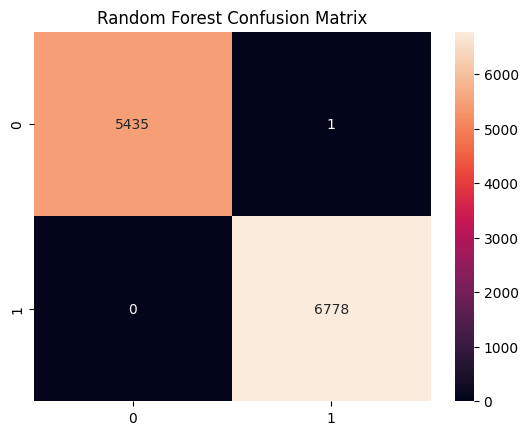

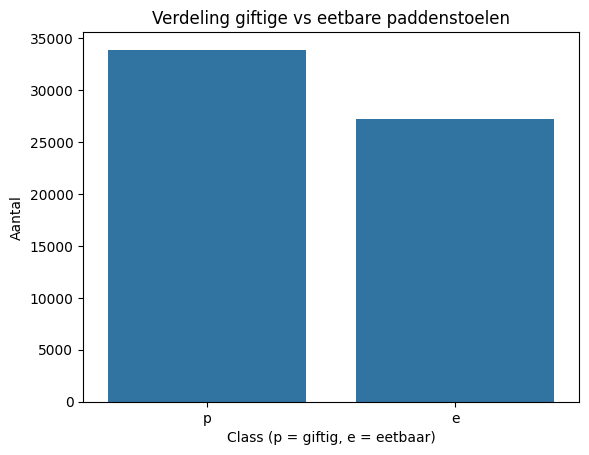

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example for Random Forest
y_pred_rf = rf_best.predict(X_test)
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Repeat for other models...

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='class')
plt.title('Verdeling giftige vs eetbare paddenstoelen')
plt.xlabel('Class (p = giftig, e = eetbaar)')
plt.ylabel('Aantal')
plt.show()



=== Model Comparison ===
        Model                                     Best Parameters Training Accuracy Test Accuracy
Random Forest         Trees: 100, Max Depth: None, Min Samples: 1            100.0%        100.0%
Decision Tree Max Depth: None, Min Samples: 1, Criterion: entropy             99.9%         99.9%
          KNN  Neighbors: 5, Weights: distance, Metric: manhattan            100.0%        100.0%

=== Detailed Classification Reports ===

Random Forest Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      5436
   Poisonous       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214


Decision Tree Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      5436
   Poisonous       1.00      

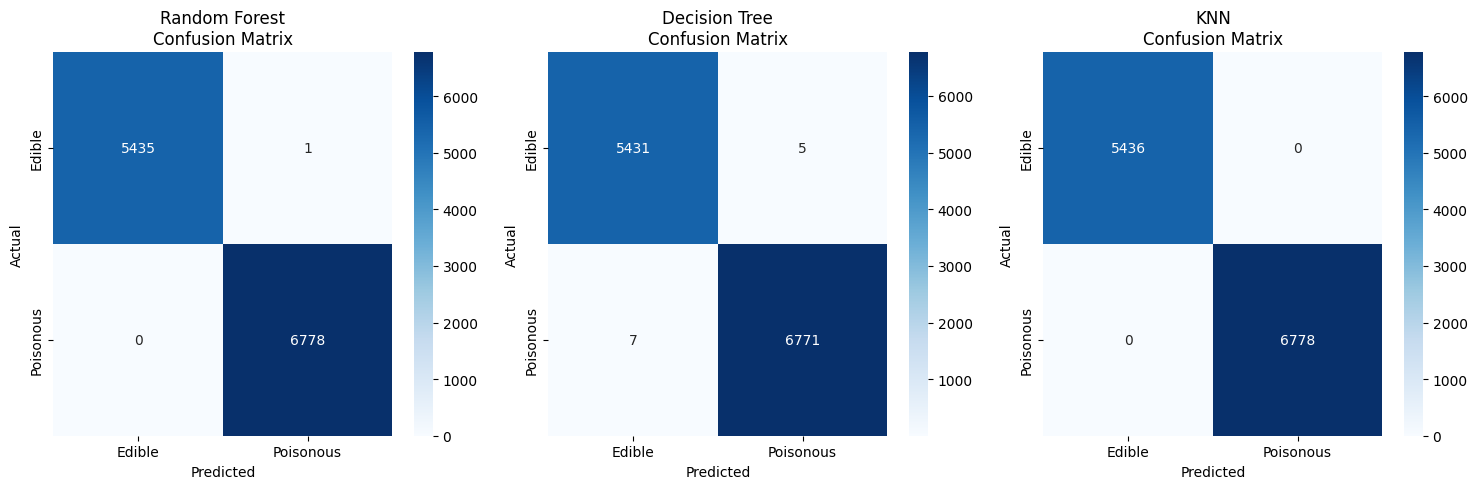

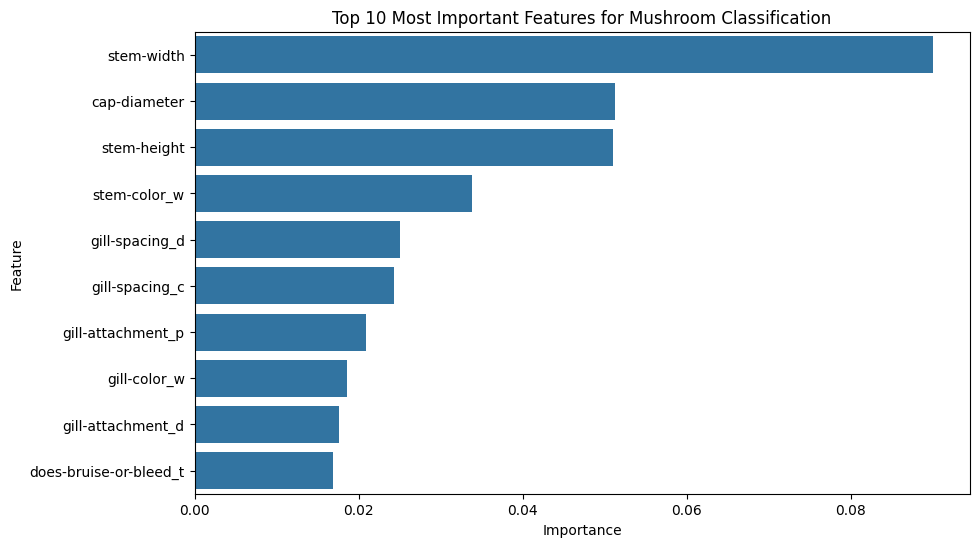

In [29]:
# Comparison table
# After running all models, let's create a more readable comparison
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a more detailed results table
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'KNN'],
    'Best Parameters': [
        f"Trees: {rf_cv.best_params_['n_estimators']}, Max Depth: {rf_cv.best_params_['max_depth']}, Min Samples: {rf_cv.best_params_['min_samples_leaf']}",
        f"Max Depth: {dt_cv.best_params_['max_depth']}, Min Samples: {dt_cv.best_params_['min_samples_leaf']}, Criterion: {dt_cv.best_params_['criterion']}",
        f"Neighbors: {knn_cv.best_params_['n_neighbors']}, Weights: {knn_cv.best_params_['weights']}, Metric: {knn_cv.best_params_['metric']}"
    ],
    'Training Accuracy': [rf_cv.best_score_, dt_cv.best_score_, knn_cv.best_score_],
    'Test Accuracy': [rf_test_acc, dt_test_acc, knn_test_acc]
})

# Format the accuracy as percentages
results['Training Accuracy'] = results['Training Accuracy'].map('{:.1%}'.format)
results['Test Accuracy'] = results['Test Accuracy'].map('{:.1%}'.format)

print("\n=== Model Comparison ===")
print(results.to_string(index=False))

# For each model, show detailed classification report
print("\n=== Detailed Classification Reports ===")
for model_name, model in [('Random Forest', rf_best), ('Decision Tree', dt_best), ('KNN', knn_best)]:
    print(f"\n{model_name} Classification Report:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))

# Create confusion matrices for each model
plt.figure(figsize=(15, 5))

# Random Forest
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, rf_best.predict(X_test)), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.title('Random Forest\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


# KNN
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, knn_best.predict(X_test)), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.title('KNN\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Decision Tree
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, dt_best.predict(X_test)), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.title('Decision Tree\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')



plt.tight_layout()
plt.show()

# Feature importance for Random Forest (most interpretable)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_best.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 10 Most Important Features for Mushroom Classification')
plt.show()

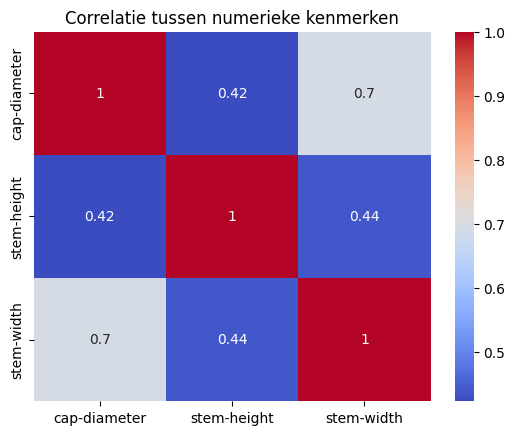

In [34]:
numerieke_kolommen = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numerieke_kolommen].corr(), annot=True, cmap='coolwarm')
plt.title('Correlatie tussen numerieke kenmerken')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier

# pas X_train en y_train aan naar wat je gebruikte
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Belangrijkste kenmerken (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [1]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf, X=X_train, y=y_train,
    cv=StratifiedKFold(n_splits=5),
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy'
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train score')
plt.plot(train_sizes, test_mean, label='Validation score')
plt.xlabel('Aantal trainingsvoorbeelden')
plt.ylabel('Accuracy')
plt.title('Leercurve Random Forest')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'rf' is not defined

C:\Users\giles\AppData\Local\Temp\ipykernel_13664\2929165463.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count_Predicted_Poisonous', y='Characteristic', data=poisonous_chars_df, palette='viridis')


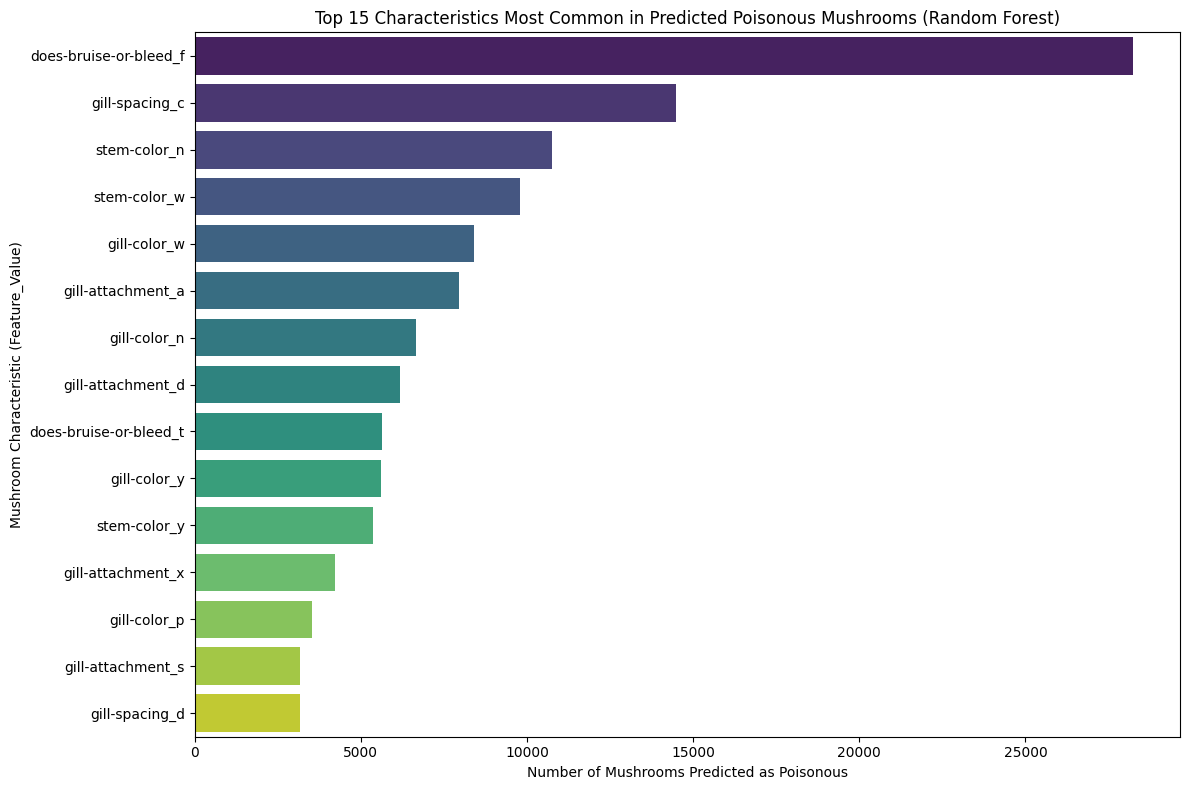


Displayed are the top 15 specific characteristics (feature_value combinations)
found most frequently among mushrooms predicted as poisonous by the Random Forest model.
Refer to the metadata.txt file to interpret the feature and value codes (e.g., odor_f -> odor: foul).


In [38]:
# Assuming df, rf_best, scaler, and feature_importance are available
# from the previous code cells

# Predict on the entire dataset using the best Random Forest model
# We need the scaled data for prediction
X_full_scaled = scaler.transform(pd.get_dummies(df.drop('class', axis=1)))
full_predictions = rf_best.predict(X_full_scaled)

# Create a DataFrame with original one-hot encoded features and predictions
df_predictions = pd.get_dummies(df.drop('class', axis=1)).copy()
df_predictions['Predicted_Class'] = full_predictions

# Get the list of top features from the feature_importance DataFrame
# Let's consider the top 10 features identified earlier
top_features_list = feature_importance['Feature'].tolist()

# Prepare data for plotting: characteristic and count of predicted poisonous
poisonous_characteristics_counts = []

# Iterate through all one-hot encoded columns that belong to the top features
for col in df_predictions.columns:
    # Check if this column is one of the one-hot encoded columns
    # and if its original feature is in our top_features_list
    original_feature_name = '_'.join(col.split('_')[:-1])
    if col != 'Predicted_Class' and original_feature_name in '_'.join(top_features_list):
        # Count how many mushrooms with this specific characteristic
        # were predicted as poisonous ('p')
        count = df_predictions[(df_predictions[col] == 1) &
                               (df_predictions['Predicted_Class'] == 'p')].shape[0]

        # Add to our list if the count is greater than 0
        if count > 0:
            poisonous_characteristics_counts.append({
                'Characteristic': col, # Use the one-hot encoded name as label
                'Count_Predicted_Poisonous': count
            })

# Convert the list to a DataFrame
poisonous_chars_df = pd.DataFrame(poisonous_characteristics_counts)

# Sort by count and get the top N characteristics for plotting
# Let's plot the top 15 characteristics with the highest counts
top_n_chars = 15
poisonous_chars_df = poisonous_chars_df.sort_values('Count_Predicted_Poisonous', ascending=False).head(top_n_chars)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Count_Predicted_Poisonous', y='Characteristic', data=poisonous_chars_df, palette='viridis')
plt.title(f'Top {top_n_chars} Characteristics Most Common in Predicted Poisonous Mushrooms (Random Forest)')
plt.xlabel('Number of Mushrooms Predicted as Poisonous')
plt.ylabel('Mushroom Characteristic (Feature_Value)')
plt.tight_layout()
plt.show()

print(f"\nDisplayed are the top {top_n_chars} specific characteristics (feature_value combinations)\nfound most frequently among mushrooms predicted as poisonous by the Random Forest model.")
print("Refer to the metadata.txt file to interpret the feature and value codes (e.g., odor_f -> odor: foul).")


## Conclusion

## Sources